## Observations and Insights 

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_file=pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_file.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice in the DataFrame.
Number_of_Mice=combined_file["Sex"].count()
Number_of_Mice

1893

In [16]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
DuplicateMouse = combined_file[combined_file.duplicated(["Mouse ID","Timepoint"])]
DuplicateMouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
DuplicateMouse1= combined_file[combined_file.duplicated(["Mouse ID"])]
DuplicateMouse1.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
newtable = combined_file.drop_duplicates('Mouse ID')
newtable.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [37]:
# Checking the number of mice in the clean DataFrame.
New_Number_of_Mice=newtable["Sex"].count()
New_Number_of_Mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regime

# This method produces everything in a single groupby function.

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,249.000000,249.000000,249.0,249.0,249.0
mean,12.730924,26.116466,0.0,45.0,0.0
std,7.228687,3.697003,0.0,0.0,0.0
min,1.000000,15.000000,0.0,45.0,0.0
25%,6.000000,25.000000,0.0,45.0,0.0
50%,13.000000,27.000000,0.0,45.0,0.0
75%,19.000000,29.000000,0.0,45.0,0.0
max,24.000000,30.000000,0.0,45.0,0.0


## Bar Plots

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

In [33]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#plt.bar(combined_file["Timepoint"],combined_file["Mouse ID"].sum(), color='r', alpha=0.5, align="center")


x_axis=combined_file["Timepoint"].value_counts()
x_axis




0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

## Pie Plots

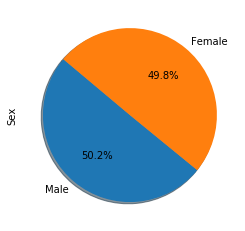

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
newtable["Sex"].value_counts().plot(kind='pie', y='Sex',autopct='%1.1f%%',shadow=True, startangle=140)



In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title=("Male vs Female Mouse",bbox={'facecolor':'0.8', 'pad':5}))
plt.pie(newtable["Sex"].value_counts(),labels=newtable["Sex"].unique(),
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

SyntaxError: invalid syntax (<ipython-input-54-5f31ee3a92b2>, line 2)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
